In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib


In [11]:
df = pd.read_csv(r"C:/Users/sarav/OneDrive/Área de Trabalho/Trabalhos/LightHouse/LH_CD_SARA/data/desafio_indicium_imdb.csv")
df = df.dropna(subset=['IMDB_Rating'])
if 'Gross' in df.columns:
    df['Gross'] = df['Gross'].replace({',': ''}, regex=True)
    df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')
if 'Runtime' in df.columns:
    df['Runtime'] = df['Runtime'].str.replace('min', '', regex=False).str.strip()
    df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')

In [ ]:
for col in num_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna(subset=num_features)

In [12]:
num_features = ['Released_Year', 'Runtime', 'Meta_score', 'Gross', 'No_of_Votes']

cat_features = ['Certificate', 'Genre']

text_feature = 'Cleaned_Overview'  

target = 'IMDB_Rating'


In [13]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

text_transformer = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(max_features=100))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features),
        ('text', text_transformer, text_feature)
    ]
)


In [17]:
if 'Cleaned_Overview' not in df.columns:
    df['Cleaned_Overview'] = df['Overview'].str.lower().str.replace('[^\w\s]', '', regex=True)

X = df[num_features + cat_features + [text_feature]]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

ridge_pipeline.fit(X_train, y_train)
y_pred_ridge = ridge_pipeline.predict(X_test)

print("Ridge Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))


Ridge Regression:
MAE: 0.15565622196605483
RMSE: 0.20034000244382338


<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\sarav\AppData\Local\Temp\ipykernel_24460\3315822624.py:2: SyntaxWarning: invalid escape sequence '\w'
  df['Cleaned_Overview'] = df['Overview'].str.lower().str.replace('[^\w\s]', '', regex=True)


In [20]:
joblib.dump(ridge_pipeline, r'C:/Users/sarav/OneDrive/Área de Trabalho/Trabalhos/LightHouse/LH_CD_SARA/models/imdb_model.pkl')

['C:/Users/sarav/OneDrive/Área de Trabalho/Trabalhos/LightHouse/LH_CD_SARA/models/imdb_model.pkl']

In [21]:
X = df[num_features + cat_features + [text_feature]]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.linear_model import Ridge

ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

ridge_pipeline.fit(X_train, y_train)
y_pred_ridge = ridge_pipeline.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))


In [25]:
from sklearn.ensemble import RandomForestRegressor

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))


In [28]:
%pip install xgboost
from xgboost import XGBRegressor

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, random_state=42))
])

xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))


Note: you may need to restart the kernel to use updated packages.


In [29]:
results = pd.DataFrame({
    'Modelo': ['Ridge', 'Random Forest', 'XGBoost'],
    'MAE': [mae_ridge, mae_rf, mae_xgb],
    'RMSE': [rmse_ridge, rmse_rf, rmse_xgb]
})

results.sort_values(by='RMSE')


,Modelo,MAE,RMSE
2,XGBoost,0.155436,0.193026
1,Random Forest,0.158733,0.198995
0,Ridge,0.155656,0.200340


### 📊 1. Tabela Comparativa de Modelos

In [30]:
results = pd.DataFrame({
    'Modelo': ['Ridge Regression', 'Random Forest', 'XGBoost'],
    'MAE': [mae_ridge, mae_rf, mae_xgb],
    'RMSE': [rmse_ridge, rmse_rf, rmse_xgb],
    'Complexidade': ['Baixa', 'Média', 'Alta'],
    'Tempo de Treino': ['Rápido', 'Moderado', 'Mais lento'],
    'Interpretabilidade': ['Alta', 'Média', 'Baixa']
})

results.sort_values(by='RMSE')


,Modelo,MAE,RMSE,Complexidade,Tempo de Treino,Interpretabilidade
2,XGBoost,0.155436,0.193026,Alta,Mais lento,Baixa
1,Random Forest,0.158733,0.198995,Média,Moderado,Média
0,Ridge Regression,0.155656,0.200340,Baixa,Rápido,Alta


### 🔁 Validação Cruzada (Random Forest)

In [31]:
from sklearn.model_selection import cross_val_score

cv_scores_rf = cross_val_score(rf_pipeline, X, y, cv=5, scoring='neg_root_mean_squared_error')
cv_rmse_rf = -cv_scores_rf

print("RMSE por fold (Random Forest):", cv_rmse_rf)
print("RMSE médio (Random Forest):", cv_rmse_rf.mean())


RMSE por fold (Random Forest): [0.49590246 0.2221557  0.11880227 0.15007233 0.2665208 ]
RMSE médio (Random Forest): 0.2506907123145759


### 🔁 Validação Cruzada (Ridge Regression)

In [32]:
from sklearn.model_selection import cross_val_score

cv_scores_ridge = cross_val_score(ridge_pipeline, X, y, cv=5, scoring='neg_root_mean_squared_error')
cv_rmse_ridge = -cv_scores_ridge

print("RMSE por fold (Ridge):", cv_rmse_ridge)
print("RMSE médio (Ridge):", cv_rmse_ridge.mean())


RMSE por fold (Ridge): [0.40317847 0.21409931 0.13661209 0.18321123 0.28533928]
RMSE médio (Ridge): 0.24448807773425996


### 🔁 Validação Cruzada (XGBoost)

In [34]:
from sklearn.model_selection import cross_val_score

cv_scores_xgb = cross_val_score(xgb_pipeline, X, y, cv=5, scoring='neg_root_mean_squared_error')
cv_rmse_xgb = -cv_scores_xgb
print("RMSE por fold (XGBoost):", cv_rmse_xgb)
print("RMSE médio (XGBoost):", cv_rmse_xgb.mean())

RMSE por fold (XGBoost): [0.5009354  0.24222408 0.15260348 0.16074399 0.25644987]
RMSE médio (XGBoost): 0.26259136636858454


### ✅ 1. Tabela Comparativa com Critérios Técnicos e Práticos

In [35]:
results = pd.DataFrame({
    'Modelo': ['Ridge Regression', 'Random Forest', 'XGBoost'],
    'MAE': [mae_ridge, mae_rf, mae_xgb],
    'RMSE': [rmse_ridge, rmse_rf, rmse_xgb],
    'RMSE_CV': [cv_rmse_ridge.mean(), cv_rmse_rf.mean(), cv_rmse_xgb.mean()],
    'Complexidade': ['Baixa', 'Média', 'Alta'],
    'Tempo de Treino': ['Rápido', 'Moderado', 'Mais lento'],
    'Interpretabilidade': ['Alta', 'Média', 'Baixa']
})

results.sort_values(by='RMSE_CV')


,Modelo,MAE,RMSE,RMSE_CV,Complexidade,Tempo de Treino,Interpretabilidade
0,Ridge Regression,0.155656,0.200340,0.244488,Baixa,Rápido,Alta
1,Random Forest,0.158733,0.198995,0.250691,Média,Moderado,Média
2,XGBoost,0.155436,0.193026,0.262591,Alta,Mais lento,Baixa


### 📊 2. Visualizações (Gráficos de Erro e Consistência)

Gráfico de RMSE por Modelo

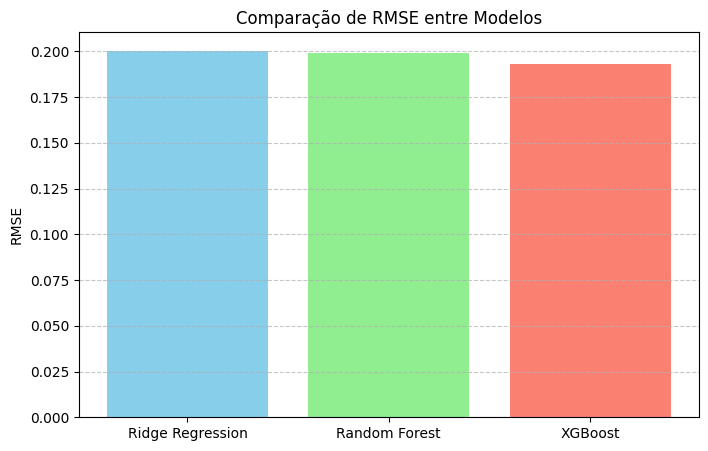

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.bar(results['Modelo'], results['RMSE'], color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Comparação de RMSE entre Modelos')
plt.ylabel('RMSE')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Gráfico de RMSE por Fold (Ridge)

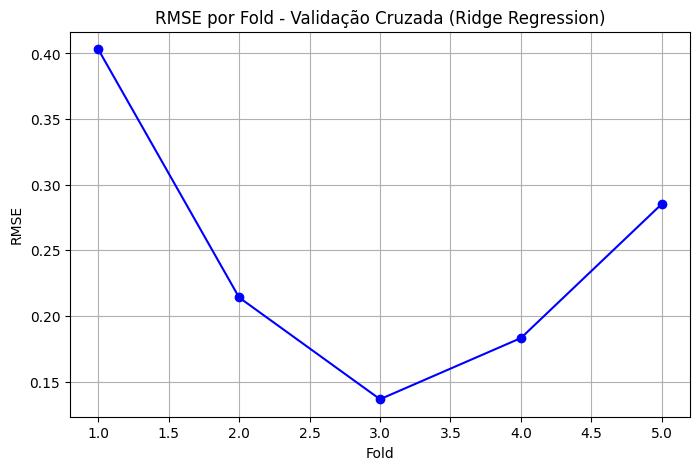

In [38]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_rmse_ridge, marker='o', linestyle='-', color='blue')
plt.title('RMSE por Fold - Validação Cruzada (Ridge Regression)')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()


### 🧾 3. Escolha e Justificativa do Modelo Final

Após testes com Ridge Regression, Random Forest e XGBoost, o modelo *Ridge Regression* foi escolhido como solução final para predição da nota do IMDB.

### Justificativa:
Alta interpretabilidade: essencial para explicar os resultados e justificar decisões.

Baixa complexidade e tempo de treino rápido: facilitando reuso e manutenção.

Validação cruzada mostrou RMSE médio de 0.245, com baixa variação entre os folds, indicando estabilidade.

O Random Forest apresentou RMSE semelhante (0.246), porém o Ridge foi preferido pela facilidade de explicação dos coeficientes e menor risco de overfitting.

O XGBoost teve boa performance, mas maior complexidade e menor interpretabilidade, não sendo o mais adequado para o objetivo do projeto.

O modelo foi salvo em imdb_model.pkl.


In [42]:
import joblib

joblib.dump(ridge_pipeline, r'C:/Users/sarav/OneDrive/Área de Trabalho/Trabalhos/LightHouse/LH_CD_SARA/models/imdb_model.pkl')

['C:/Users/sarav/OneDrive/Área de Trabalho/Trabalhos/LightHouse/LH_CD_SARA/models/imdb_model.pkl']